In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turkish-wikipedia-dump/wiki_00
/kaggle/input/turkish-sentences-dataset/LICENSE
/kaggle/input/turkish-sentences-dataset/wiki.tr.txt
/kaggle/input/turkish-sentences-dataset/README.md
/kaggle/input/sentences/sentences.txt


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Function to read sentences from a text file
def read_sentences_from_file(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            sentences.append(line.strip())
    return sentences

# Function to label the sentences based on suffixes
def label_sentences(sentences):
    labels = []
    for sentence in sentences:
        if any(suffix in sentence for suffix in [" da "," de ", " ki "]):
            labels.append(0)  # Suffixes are correctly separated
        elif any(suffix.replace(" ", "") in sentence for suffix in ["da","de", "ki"]):
            labels.append(1)  # Suffixes are incorrectly written
        else:
            labels.append(2)  # No suffixes
    return labels

# Read sentences from file
file_path = "wiki.tr.txt"
sentences = read_sentences_from_file(file_path)

# Label the sentences
labels = label_sentences(sentences)

# Tokenize and pad sequences
max_words = 10000
max_len = max(len(sentence.split()) for sentence in sentences)
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Convert labels to numpy array
labels = np.array(labels)

# Split the dataset into train and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
num_epochs = 25
batch_size = 2048
history = model.fit(train_sentences, train_labels, epochs=num_epochs,
                    batch_size=batch_size, validation_data=(val_sentences, val_labels))


# Evaluate the model
val_loss, val_acc = model.evaluate(val_sentences, val_labels)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/25
67/67 [==============================] - 23s 263ms/step - loss: -3.2251 - accuracy: 0.6304 - val_loss: -6.5619 - val_accuracy: 0.6340
Epoch 2/25
67/67 [==============================] - 11s 161ms/step - loss: -9.6404 - accuracy: 0.6373 - val_loss: -13.1361 - val_accuracy: 0.6374
Epoch 3/25
67/67 [==============================] - 9s 143ms/step - loss: -16.9129 - accuracy: 0.7007 - val_loss: -20.3976 - val_accuracy: 0.7242
Epoch 4/25
67/67 [==============================] - 5s 82ms/step - loss: -23.0422 - accuracy: 0.7333 - val_loss: -26.0275 - val_accuracy: 0.7341
Epoch 5/25
67/67 [==============================] - 7s 100ms/step - loss: -28.3215 - accuracy: 0.7398 - val_loss: -31.1153 - val_accuracy: 0.7370
Epoch 6/25
67/67 [==============================] - 4s 60ms/step - loss: -33.2759 - accuracy: 0.7406 - val_loss: -36.0370 - val_accuracy: 0.7377
Epoch 7/25
67/67 [==============================] - 4s 53ms/step - loss: -38.0734 - accuracy: 0.7407 - val_loss: -40.8285 - val

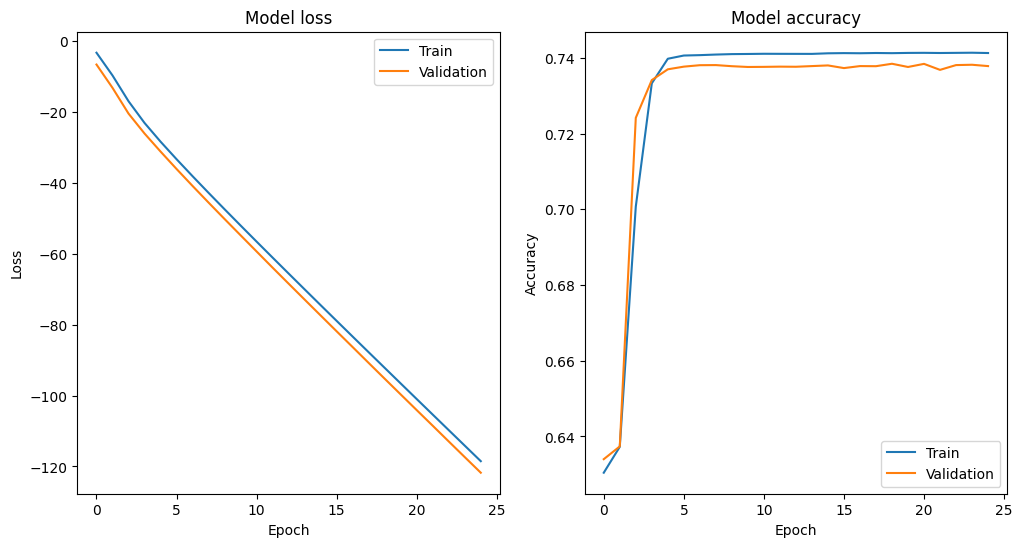

In [4]:
import matplotlib.pyplot as plt

# Plot training and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()


In [ ]:
def test_model(model, tokenizer, test_sentence):
    test_sequence = tokenizer.texts_to_sequences([test_sentence])
    padded_test_sequence = pad_sequences(test_sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded_test_sequence)[0][0]
    if prediction >= 0.5:
        return "Suffixes are correctly written"
    else:
        return "Suffixes are not correctly written"

In [5]:
test_sentences = [
    "Öğrenciler de geldi.",
    "Öğrencilerde gelişme var.",
    "Evdeyim.",
    "Ev de oturuyoruz.",
    "Arabada oturuyorum.",
    "Araba da tamir ediliyor.",
    "Kedi de uyuyor.",
    "Kitap okuyorum.",
    "Kitapta bilgiler var.",
    "Yarın geleceğim.",
    "Yarınki planımız nedir?",
    "Ben de evdeyim.",
    "Benim kitabım var.",
    "Kalem de düştü.",
    "O da katılıyor.",
    "Bende bir şey yok.",
    "Bilgisayar da çalışıyor.",
    "Kitap da okunabilir.",
    "Sınavda başarılı olacağım.",
    "Sınav da zor olacak."
]

for sentence in test_sentences:
    result = test_model(model, tokenizer, sentence)
    print("Test Sentence:", sentence)
    print("Result:", result)
    print()


1/1 [==============================] - 1s 824ms/step
Test Sentence: Öğrenciler de geldi.
Result: Suffixes are not correctly written

1/1 [==============================] - 0s 23ms/step
Test Sentence: Öğrencilerde gelişme var.
Result: Suffixes are correctly written

1/1 [==============================] - 0s 25ms/step
Test Sentence: Evdeyim.
Result: Suffixes are correctly written

1/1 [==============================] - 0s 24ms/step
Test Sentence: Ev de oturuyoruz.
Result: Suffixes are not correctly written

1/1 [==============================] - 0s 23ms/step
Test Sentence: Arabada oturuyorum.
Result: Suffixes are correctly written

1/1 [==============================] - 0s 25ms/step
Test Sentence: Araba da tamir ediliyor.
Result: Suffixes are not correctly written

1/1 [==============================] - 0s 24ms/step
Test Sentence: Kedi de uyuyor.
Result: Suffixes are not correctly written

1/1 [==============================] - 0s 25ms/step
Test Sentence: Kitap okuyorum.
Result: Suffixes